In [2]:
%%time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


CPU times: user 588 µs, sys: 19 µs, total: 607 µs
Wall time: 705 µs


In [3]:
%%time
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('X_train[0]_shape: ', X_train[0].shape)
print('y_train shape: ', y_train.shape)

X_train

X_train:  60000
X_test:  10000
X_train[0]_shape:  (28, 28)
y_train shape:  (60000,)
CPU times: user 229 ms, sys: 57 ms, total: 286 ms
Wall time: 437 ms


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

y_train[0] :  5
y_train[1] :  0


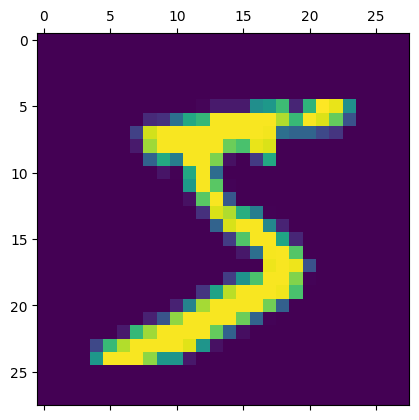

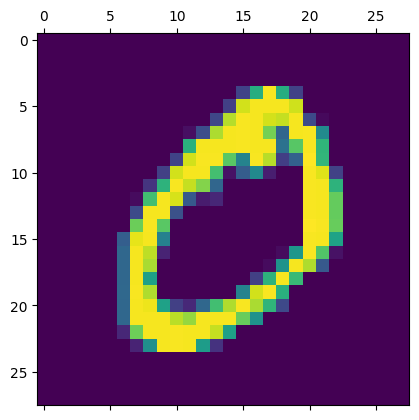

In [4]:
plt.matshow(X_train[0])
print('y_train[0] : ',y_train[0])
plt.matshow(X_train[1])
print('y_train[1] : ',y_train[1])

In [5]:
print('y_train[0] : ',y_train[0])
print('y_train[1] : ',y_train[1])


y_train[0] :  5
y_train[1] :  0


In [6]:
X_train.shape 

(60000, 28, 28)

In [7]:
# scaling the data by the maximum value
X_train = X_train / 255
X_test = X_test / 255



In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [9]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
   keras.layers.Dense(10, input_shape= (784,),activation='sigmoid')
])
model.compile(optimizer = 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy']
      )

model.fit(X_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4666 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9258


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.9252


[0.26744315028190613, 0.9251999855041504]

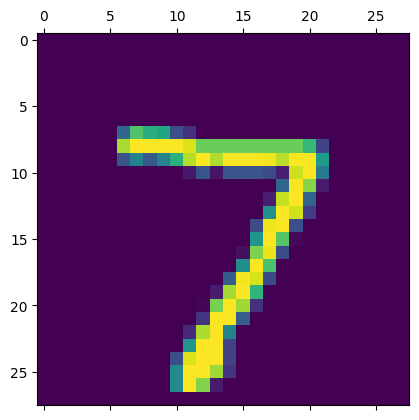

In [14]:
plt.matshow(X_test[0])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.65311992e-02, 3.32349003e-07, 3.55515704e-02, 9.48993802e-01,
       1.97404483e-03, 1.24830075e-01, 1.34940910e-06, 9.99715149e-01,
       8.63628238e-02, 7.17279494e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    7,    2,    1,    1],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   7,   11,  915,   18,    9,    5,   12,   11,   39,    5],
       [   2,    0,   17,  914,    0,   35,    2,   10,   18,   12],
       [   2,    1,    4,    1,  908,    0,   10,    4,    8,   44],
       [   9,    2,    3,   24,    9,  792,   12,    5,   28,    8],
       [   9,    3,    5,    1,    7,   15,  913,    2,    3,    0],
       [   1,    5,   20,    7,    6,    1,    0,  947,    3,   38],
       [   6,   10,    6,   19,    9,   35,    9,   10,  855,   15],
       [  11,    7,    1,    8,   24,    8,    0,   14,    3,  933]],
      dtype=int32)>

In [19]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


ModuleNotFoundError: No module named 'seaborn'